In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from astropy.table import Table

In [3]:
apogee = Table.read('/data/jls/GaiaDR2/spectro/APOGEE_distances_MASTER.hdf5')
apogee_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/APOGEE_input.hdf5')
print 'Processed:',np.count_nonzero(apogee['flag']==0.), 'out of', len(apogee)
rave = Table.read('/data/jls/GaiaDR2/spectro/RAVE_DR5_distances_MASTER.hdf5')
rave_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/RAVE_input.hdf5')
print 'Processed:',np.count_nonzero(rave['flag']==0.), 'out of', len(rave)
ges = Table.read('/data/jls/GaiaDR2/spectro/GES_distances_MASTER.hdf5')
ges_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/GES_iDR4_input.hdf5')
print 'Processed:',np.count_nonzero(ges['flag']==0.), 'out of', len(ges)
galah = Table.read('/data/jls/GaiaDR2/spectro/GALAH_distances_MASTER.hdf5')
galah_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/GALAH_input.hdf5')
print 'Processed:',np.count_nonzero(galah['flag']==0.), 'out of', len(galah)
lamost = Table.read('/data/jls/GaiaDR2/spectro/LAMOST_distances_MASTER.hdf5')
lamost_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/LAMOST_input.hdf5')
print 'Processed:',np.count_nonzero(lamost['flag']==0.), 'out of', len(lamost)
raveON = Table.read('/data/jls/GaiaDR2/spectro/RAVE_Cannon_distances_MASTER.hdf5')
raveON_inputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/RAVEON_input.hdf5')
print 'Processed:',np.count_nonzero(raveON['flag']==0.), 'out of', len(raveON)

/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Processed: 209304 out of 258475
Processed: 425018 out of 457555
Processed: 29276 out of 54525
Processed: 186503 out of 342682
Processed: 2788814 out of 3177995
Processed: 382407 out of 457555


In [4]:
joint = pd.concat([ges.to_pandas(),raveON.to_pandas(),
                   galah.to_pandas(),apogee.to_pandas(),
                   lamost.to_pandas()],axis=0)

jointinputs = pd.concat([ges_inputs,rave_inputs,
                   galah_inputs,apogee_inputs,
                   lamost_inputs],axis=0)

joint['age']=np.power(10.,joint['log10_age'])

In [5]:
surveys = ['Survey','RAVE','RAVEON','GALAH','APOGEE','LAMOST','GES','All']
total_processed = ['Total', len(rave), len(raveON), len(galah), len(apogee), len(lamost), len(ges),len(joint)]
matches = ['Gaia matches',np.count_nonzero(rave['source_id']>0.), 
           np.count_nonzero(raveON['source_id']>0.), 
           np.count_nonzero(galah['source_id']>0.), 
           np.count_nonzero(apogee['source_id']>0.), 
           np.count_nonzero(lamost['source_id']>0.), 
           np.count_nonzero(ges['source_id']>0.), 
           np.count_nonzero(np.unique(joint['source_id'][joint['source_id']>0]))]
successes = ['Success',np.count_nonzero(rave['flag']==0), 
           np.count_nonzero(raveON['flag']==0), 
           np.count_nonzero(galah['flag']==0), 
           np.count_nonzero(apogee['flag']==0), 
           np.count_nonzero(lamost['flag']==0), 
           np.count_nonzero(ges['flag']==0),
            np.count_nonzero(joint['flag']==0)]
successesG = ['Success with Gaia',np.count_nonzero((rave['flag']==0)&(rave['source_id']>0)), 
           np.count_nonzero((raveON['flag']==0)&(raveON['source_id']>0)), 
           np.count_nonzero((galah['flag']==0)&(galah['source_id']>0)), 
           np.count_nonzero((apogee['flag']==0)&(apogee['source_id']>0)), 
           np.count_nonzero((lamost['flag']==0)&(lamost['source_id']>0)), 
           np.count_nonzero((ges['flag']==0)&(ges['source_id']>0)), 
           np.count_nonzero(np.unique(joint['source_id'][(joint['flag']==0)&(joint['source_id']>0)]))]
import tabulate
tab = tabulate.tabulate([surveys, total_processed, matches, successes, successesG],tablefmt='latex')
with open('table.dat', 'w') as f:
    f.write(tab)

In [6]:
!more table.dat

\begin{tabular}{llllllll}
\hline
 Survey            & RAVE   & RAVEON & GALAH  & APOGEE & LAMOST  & GES   & All  
   \\
 Total             & 457555 & 457555 & 342682 & 258475 & 3177995 & 54525 & 42912
32 \\
 Gaia matches      & 456346 & 456346 & 342166 & 256347 & 3168241 & 54424 & 35524
02 \\
 Success           & 425018 & 382407 & 186503 & 209304 & 2788814 & 29276 & 35963
04 \\
 Success with Gaia & 425018 & 382407 & 186503 & 209304 & 2788814 & 29276 & 29883
03 \\
\hline
\end{tabular}


### Binary stars

In [291]:
g = np.genfromtxt('/data/jls/isochrones/PARSEC_Gaia/grid/gaia_0.003.dat')
!head -15 /data/jls/isochrones/PARSEC_Gaia/grid/gaia_0.003.dat

# File generated by CMD 3.0 (http://stev.oapd.inaf.it/cmd) on Mon Mar 19 16:49:29 CET 2018
# PARSEC isochrones, release v1.2S
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287
# Warning: you choose not to include the TP-AGB phase!
# Photometric system: Gaia's DR2 G, G_BP and G_RP (Vegamags)
# Using NBC version of bolometric corrections as in Chen et al. (2014), MNRAS, 444, 2525
# BCs of Carbon stars derive from Aringer et al. (2009, A&A 503, 913)
# O-rich circumstellar dpmod60alox40 dust from Groenewegen (2006)
# C-rich circumstellar AMCSIC15 dust from Groenewegen (2006)
# IMF: Chabrier (2001) lognormal 
# On RGB, assumed Reimers mass loss with efficiency eta=0.2
# Kind of output: isochrone tables
#	Isochrone  Z = 0.01479	Y = 0.27470	[M/H] = 0.003	eta_R = 0.200	Age = 	3.9811e+06 yr
#      Z	log(age/yr)	M_ini   	M_act	logL/Lo	logTe	logG	mbol    G       G_BP    G_RP	int_IMF	sta

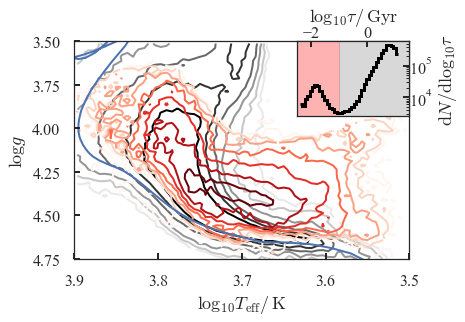

In [344]:
H=plt.hist2d(joint['log10_teff'][(joint['flag']==0)&(joint['log10_age']>-1.)],
           joint['logg'][(joint['flag']==0)&(joint['log10_age']>-1.)],
           bins=60,range=[[3.5,3.9],[3.5,5.]],
           norm=LogNorm(),
            );
H2=plt.hist2d(joint['log10_teff'][(joint['flag']==0)&(joint['log10_age']<-1.)],
           joint['logg'][(joint['flag']==0)&(joint['log10_age']<-1.)],
           bins=60,range=[[3.5,3.9],[3.5,5.]],
           norm=LogNorm(),
           cmap=plt.cm.viridis
          );
plt.clf()
plt.contour(.5*(H[1][1:]+H[1][:-1]),.5*(H[2][1:]+H[2][:-1]),np.log10(H[0]).T)
plt.contour(.5*(H2[1][1:]+H2[1][:-1]),.5*(H2[2][1:]+H2[2][:-1]),np.log10(H2[0]).T,cmap=plt.cm.Reds)
plt.xlim(3.9,3.5)
plt.ylim(4.75,3.5)
plt.xlabel(r'$\log_{10}T_\mathrm{eff}/\,\mathrm{K}$')
plt.ylabel(r'$\log g$')
plt.plot(g.T[5][g.T[1]==9.],g.T[6][g.T[1]==9.])
plt.axes([0.64,0.62,0.26,0.26])
plt.axvspan(-3,-1, alpha=0.3, color='red')
plt.axvspan(-1,2, alpha=0.3, color='gray')
plt.xlim(-2.5,1.5)

plt.hist(joint['log10_age'][joint['flag']==0],histtype='step',lw=3,bins=40,color='k');
plt.xlabel(r'$\log_{10}\tau/\,\mathrm{Gyr}$')
plt.ylabel(r'$\mathrm{d}N/\mathrm{d}\log_{10}\tau$')
plt.gca().xaxis.tick_top()
plt.gca().yaxis.tick_right()
plt.gca().xaxis.set_label_position('top') 
plt.gca().yaxis.set_label_position('right') 
plt.gca().tick_params(axis='both', which='major', pad=0)
plt.semilogy()
plt.savefig('age_binary.pdf', bbox_inches='tight')

### Input/Output teff,logg,Z

In [218]:
def input_output(inputs, data, a, title):
    fltr = data['flag']==0
    fltr &= data['log10_age']>-1.
    plt.sca(a[0])
    plt.scatter(np.log10(inputs['teff'][fltr]),inputs['logg'][fltr],
                c=inputs['fe_h'][fltr],s=1,cmap=plt.cm.viridis, alpha=0.2, vmin=-2., vmax=0.5);
    plt.xlabel(r'$\log_{10}T_\mathrm{eff}$')
    plt.ylabel(r'$\log g$')
    plt.annotate(title,xy=(0.05,0.95),ha='left',va='top',xycoords='axes fraction',fontsize=16)
    plt.colorbar(label='[M/H]')
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlim(4.,3.4)
    plt.ylim(5.5,-0.5)
    plt.sca(a[1])
    plt.scatter(data['log10_teff'][fltr],data['logg'][fltr],c=data['Z'][fltr],s=1,
                cmap=plt.cm.viridis, alpha=0.2, vmin=-2., vmax=0.5);
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlabel(r'$\log_{10}T_\mathrm{eff}$')
    plt.ylabel(r'$\log g$')
    plt.colorbar(label='[M/H]')
    plt.xlim(4.,3.4)
    plt.ylim(5.5,-0.5)
    plt.tight_layout()

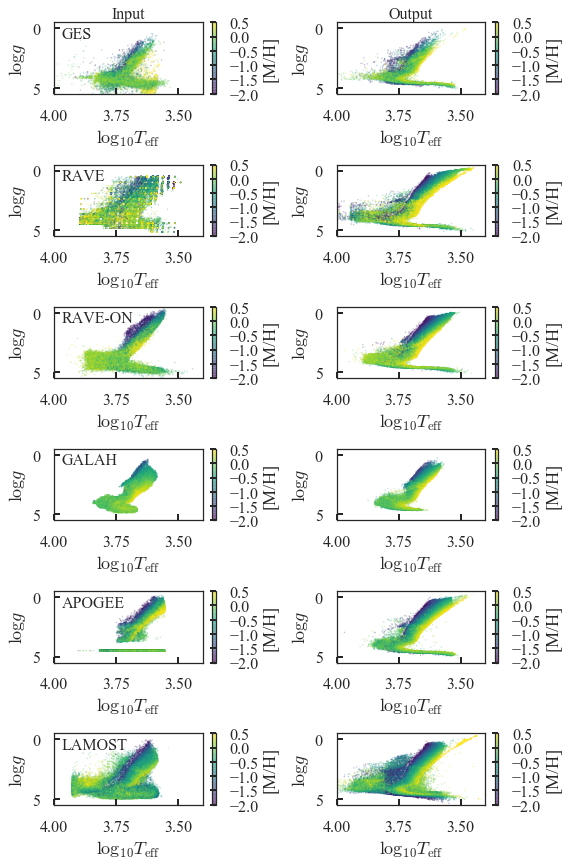

In [220]:
f,a=plt.subplots(6,2,figsize=[8.,12.])
plt.sca(a[0][0]);plt.gca().annotate('Input',(0.5,1.),
                                    fontsize=16,xycoords='axes fraction',ha='center',va='bottom')
plt.sca(a[0][1]);plt.gca().annotate('Output',(0.5,1.),
                                    fontsize=16,xycoords='axes fraction',ha='center',va='bottom')
input_output(ges_inputs, ges, a[0], 'GES')
input_output(rave_inputs, rave, a[1], 'RAVE')
input_output(raveON_inputs, raveON, a[2], 'RAVE-ON')
input_output(galah_inputs, galah, a[3], 'GALAH')
input_output(apogee_inputs, apogee, a[4], 'APOGEE')
input_output(lamost_inputs, lamost, a[5], 'LAMOST')
plt.savefig('hr_diagrams.png',dpi=400,bbox_inches='tight')

In [233]:
def giants(d):
    return d['logg']<3.
def turnoff(d):
    return (d['logg']<4.5)&(d['logg']>3.6)&(d['log10_teff']<4.1)
def hq_age(d):
    return (d['log10_age']>-1)&(d['log10_age_err']*np.log(10.)<0.3)

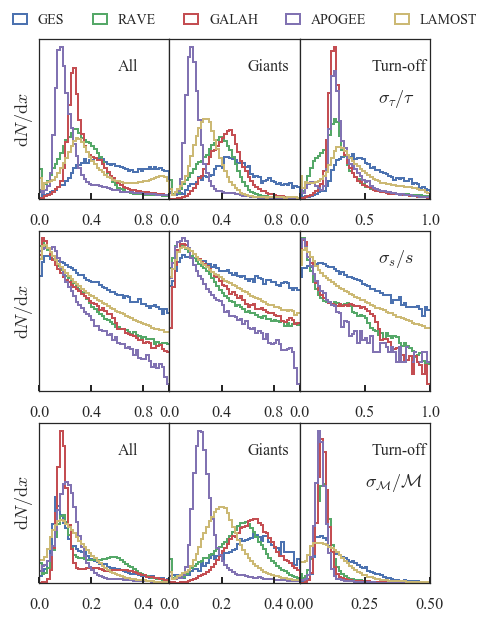

In [277]:
from matplotlib.ticker import MaxNLocator
f,a=plt.subplots(3,3,figsize=[7,10.])
plt.sca(a[0][0])
plt.subplots_adjust(wspace=0.)
[plt.hist(s['log10_age_err'][s['log10_age']>-.1]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
plt.legend(loc='lower left',bbox_to_anchor=(-0.3,1.), ncol=5, handlelength=1, fontsize=14)
plt.annotate('All', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)

plt.sca(a[0][1])
plt.annotate('Giants', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist(s['log10_age_err'][(s['log10_age']>-.1)&giants(s)]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.legend()
plt.sca(a[0][2])
plt.annotate('Turn-off', xy=(0.55,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist(s['log10_age_err'][(s['log10_age']>-.1)&turnoff(s)]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.annotate(r'$\sigma_\tau/\tau$', xy=(0.6,0.6), xycoords='axes fraction', fontsize=18)

plt.sca(a[1][0])
plt.subplots_adjust(wspace=0.)
[plt.hist((s['dist_err']/s['dist'])[s['log10_age']>-.1]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_d/d$')
plt.semilogy()

# plt.legend()
plt.sca(a[1][1])
[plt.hist((s['dist_err']/s['dist'])[(s['log10_age']>-.1)&giants(s)]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_d/d$')
plt.semilogy()
# plt.legend()
plt.sca(a[1][2])
[plt.hist((s['dist_err']/s['dist'])[(s['log10_age']>-.1)&turnoff(s)]*np.log(10.),bins=50,
          histtype='step',range=[0.,1.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_d/d$')
plt.annotate(r'$\sigma_s/s$', xy=(0.6,0.8), xycoords='axes fraction', fontsize=18)
plt.semilogy()

plt.sca(a[2][0])
[plt.hist((s['mass_err']/s['mass'])[s['log10_age']>-.1]*np.log(10.),bins=50,
          histtype='step',range=[0.,0.5],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
plt.annotate('All', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)

plt.sca(a[2][1])
plt.annotate('Giants', xy=(0.6,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['mass_err']/s['mass'])[(s['log10_age']>-.1)&giants(s)]*np.log(10.),bins=50,
          histtype='step',range=[0.,0.5],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
# plt.xlabel(r'$\sigma_\tau/\tau$')
# plt.legend()
plt.sca(a[2][2])
plt.annotate('Turn-off', xy=(0.55,0.8), xycoords='axes fraction', fontsize=16)
[plt.hist((s['mass_err']/s['mass'])[(s['log10_age']>-.1)&turnoff(s)]*np.log(10.),bins=50,
          histtype='step',range=[0.,0.5],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.annotate(r'$\sigma_\mathcal{M}/\mathcal{M}$', xy=(0.5,0.6), xycoords='axes fraction', fontsize=18)

for i in range(3):
    a[0][i].set_xlim(0.,1.)
    a[1][i].set_xlim(0.,1.)
    a[2][i].set_xlim(0.,0.5)
    a[i][0].set_ylabel(r'$\mathrm{d}N/\mathrm{d}x$')
    for j in range(3):
        a[i][j].axes.get_yaxis().set_ticks([])
    for j in range(2):
        a[i][j].xaxis.set_major_locator(MaxNLocator(nbins=3))
# plt.legend()
plt.savefig('uncertainties.pdf', bbox_inches='tight')

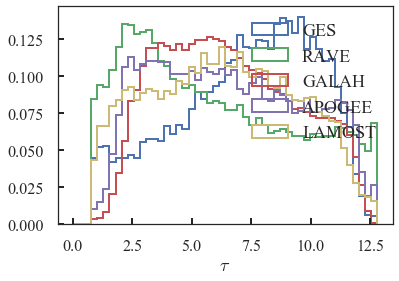

In [347]:
[plt.hist(np.power(10.,s['log10_age'])[(s['log10_age']>-.1)&turnoff(s)],bins=50,
          histtype='step',range=[0.,12.8],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.xlabel(r'$\tau$')
plt.legend()

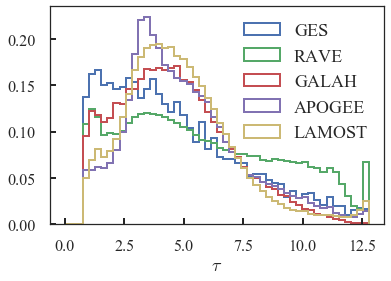

In [348]:
[plt.hist(np.power(10.,s['log10_age'])[(s['log10_age']>-.1)&giants(s)],bins=50,
          histtype='step',range=[0.,12.8],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.xlabel(r'$\tau$')
plt.legend()

(3.6, 3.9)

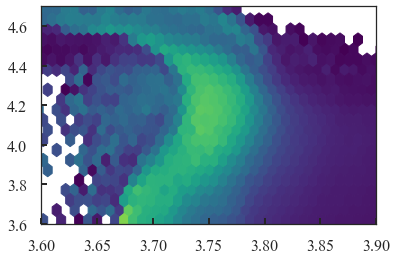

In [87]:
plt.hexbin(lamost['log10_teff'][lamost['log10_age']>-1],
         lamost['logg'][lamost['log10_age']>-1],C=np.power(10.,lamost['log10_age'][lamost['log10_age']>-1]),
          cmap=plt.cm.viridis)
plt.ylim(3.6,4.7)
plt.xlim(3.6,3.9)

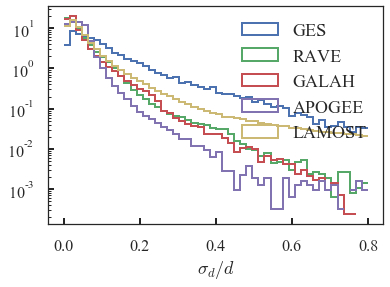

In [349]:
[plt.hist((s['dist_err']/s['dist'])[s['log10_age']>-.1],bins=50,
          histtype='step',range=[0.,0.8],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.xlabel(r'$\sigma_d/d$')
plt.semilogy()
plt.legend()

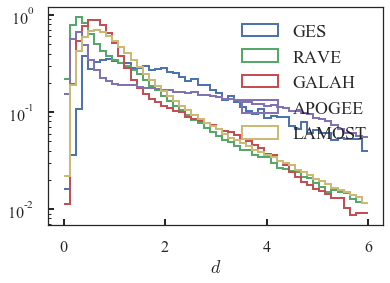

In [62]:
[plt.hist(s['dist'][s['log10_age']>-.1],bins=50,
          histtype='step',range=[0.,6.],lw=2,normed=True,label=l) 
         for s,l in zip([ges, rave, galah, apogee, lamost],['GES','RAVE','GALAH','APOGEE','LAMOST'])];
plt.xlabel(r'$d$')
plt.semilogy()
plt.legend()

In [52]:
joint['x']=joint['R']*np.cos(joint['phi'])
joint['y']=joint['R']*np.sin(joint['phi'])

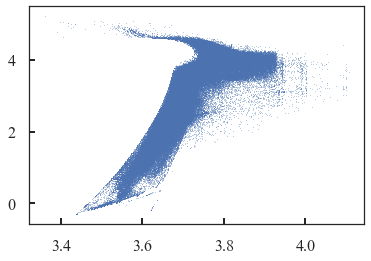

In [48]:
plt.plot(joint['log10_teff'][hq_age(joint)],joint['logg'][hq_age(joint)],'.',ms=1)

(-8.0, 8.0)

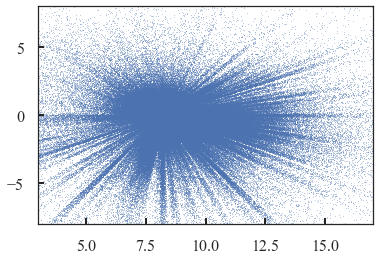

In [60]:
plt.plot(joint['x'][hq_age(joint)],joint['y'][hq_age(joint)],'.',ms=1)
plt.xlim(3.,17.)
plt.ylim(-8.,8.)

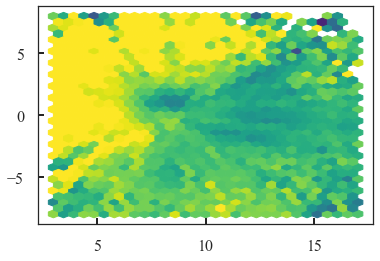

In [62]:
plt.hexbin(joint['x'][giants(joint)],joint['y'][giants(joint)],
           C=np.power(10.,joint['log10_age'])[giants(joint)],
           reduce_C_function=np.nanmean,vmin=2.,vmax=6.,
           gridsize=30,extent=[3.,17,-8.,8.],cmap=plt.cm.viridis,mincnt=3)

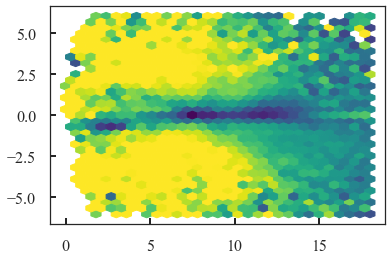

In [77]:
plt.hexbin(joint['R'][giants(joint)],joint['z'][giants(joint)],
           C=np.power(10.,joint['log10_age'])[giants(joint)],
           reduce_C_function=np.nanmean,vmin=3.,vmax=6.5,
           gridsize=30,extent=[0.,18,-6.,6.],cmap=plt.cm.viridis,mincnt=3)

# On-sky maps

In [7]:
import healpy as hp
def gen_fast_map(data, nside=64, bin_edges=[0.,0.],label=''):
    b = np.rad2deg(data.b)
    l = np.rad2deg(data.l)
    fltr = (b>-90.)&(b<90.)
    l=l[fltr]
    b=b[fltr]
    ip_ = hp.ang2pix(nside, l, b, lonlat=True)
    npixel  = hp.nside2npix(nside)
    map_ = np.bincount(ip_,minlength=npixel)
    map = np.log10(map_+1.)
    hp.visufunc.mollview(map,hold=True,title='%0.2f,%0.2f'%(bin_edges[0],bin_edges[1]),unit=label)

def gen_fast_map_fld(data, fld, nside=64, vmin=None, vmax=None, 
                     bin_edges=[0.,0.],cmap=plt.cm.viridis,label='',rot=None):
    cmap.set_under('white')
    b = np.rad2deg(data.b)
    l = np.rad2deg(data.l)
    fltr = (b>-90.)&(b<90.)
    l=l[fltr]
    b=b[fltr]
    fldd=data[fld][fltr]
    ip_ = hp.ang2pix(nside, l, b, lonlat=True)
    npixel  = hp.nside2npix(nside)
    map = np.array([np.nanmedian(fldd[ip_==i]) for i in range(npixel)])
    hp.visufunc.mollview(map,hold=True,min=vmin,max=vmax,
                    title='%0.2f,%0.2f'%(bin_edges[0],bin_edges[1]),cmap=cmap,unit=label,rot=rot)

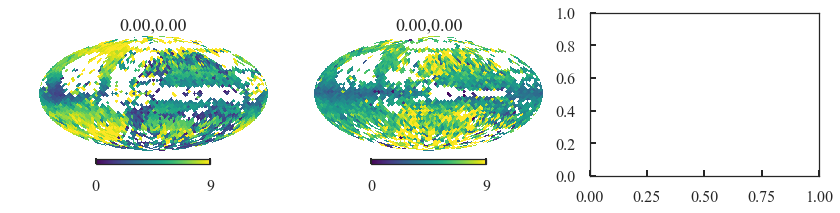

In [95]:
f,a=plt.subplots(1,3,figsize=[14.,3.])
plt.sca(a[0])
gen_fast_map_fld(joint[turnoff(joint)&(joint.log10_age>-1.)&(joint.s>0.8)&(joint.s<1.2)&(joint.log10_age_err<0.3)],
                 'age',nside=16,vmin=0.,vmax=9.)
plt.sca(a[1])
gen_fast_map_fld(joint[giants(joint)&(joint.log10_age>-1.)&(joint.s>3.)&(joint.s<3.5)&(joint.log10_age_err<0.3)],
                 'age',nside=16,vmin=0.,vmax=9.)

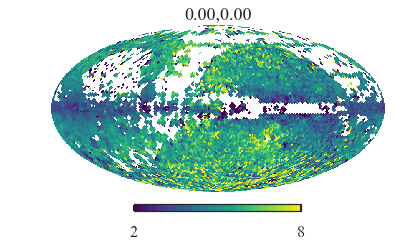

In [55]:
gen_fast_map_fld(joint[(joint.log10_age>-1.)&giants(joint)],
                 'age',nside=32,vmin=2.,vmax=8.)

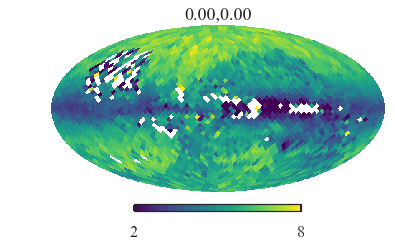

In [356]:
gen_fast_map_fld(joint[(joint.log10_age>-1.)],
                 'age',nside=16,vmin=2.,vmax=8.)

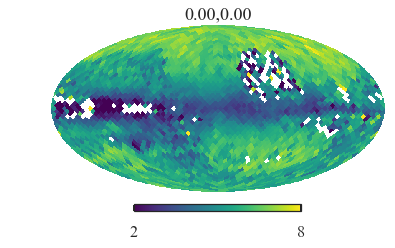

In [357]:
gen_fast_map_fld(joint[(joint.log10_age>-1.)],
                 'age',nside=16,vmin=2.,vmax=8.,rot=[180.,0.])

In [360]:
np.count_nonzero((joint.log10_age>-1.)&(joint.flag==0))

3402497

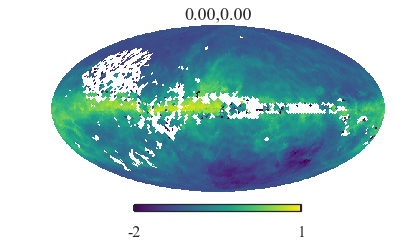

In [358]:
gen_fast_map_fld(joint[(joint.log10_age>-1.)],
                 'log10_av',nside=32,vmin=-2.,vmax=1.)

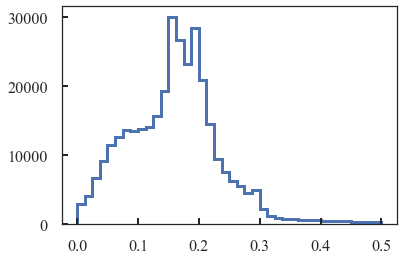

In [378]:
plt.hist((joint.log10_av_err*np.log(10.))[(jointinputs.dec.values<-20.*np.pi/180.)&(joint.b<-20.*np.pi/180.)],
         histtype='step',lw=3,bins=40,range=[0.,0.5]);
# plt.xlabel(r'$\log_{10}(\sigma_{A_V}/A_V)$')

/data/jls/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


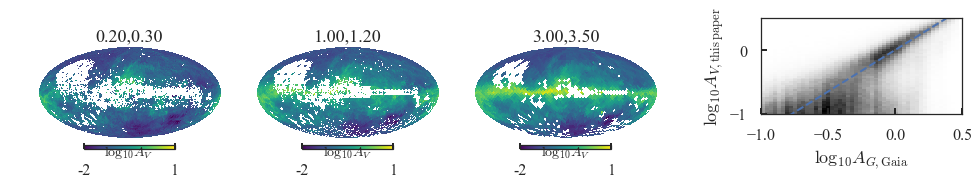

In [47]:
from matplotlib.colors import LogNorm
f,a=plt.subplots(1,4,figsize=[15.,2.5])
plt.sca(a[0])
gen_fast_map_fld(joint[(joint.log10_age>-1.)&(joint.s<0.3)&(joint.s>0.2)],
                 'log10_av',nside=32,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[0.2,0.3])
plt.sca(a[1])
gen_fast_map_fld(joint[(joint.log10_age>-1.)&(joint.s>1.)&(joint.s<1.2)],
                 'log10_av',nside=32,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[1.,1.2])
plt.sca(a[2])
gen_fast_map_fld(joint[(joint.log10_age>-1.)&(joint.s>3.)&(joint.s<3.5)],
                 'log10_av',nside=16,vmin=-2.,vmax=1.,label=r'$\log_{10}A_V$',bin_edges=[3.,3.5])
plt.sca(a[3])
plt.hist2d(np.log10(jointinputs.a_g_val)[joint['log10_age_err'].values>-1.],
           joint['log10_av'][joint['log10_age_err']>-1.],range=[[-1.,0.5],[-1.,0.5]],bins=50);#,norm=LogNorm());
xx = np.linspace(-1.,0.5)
# plt.plot(xx,xx,label=r'$\frac{R(G)}{R(V)}=1$')
plt.plot(xx,xx/0.77,label=r'$\frac{R(G)}{R(V)}=0.77$',ls='dashed')
# plt.legend(loc='upper left')
plt.xlabel(r'$\log_{10}A_{G,\mathrm{Gaia}}$')
plt.ylabel(r'$\log_{10}A_{V,\mathrm{this\,paper}}$')
plt.tight_layout()
plt.savefig('extinction.pdf',bbox_inches='tight')

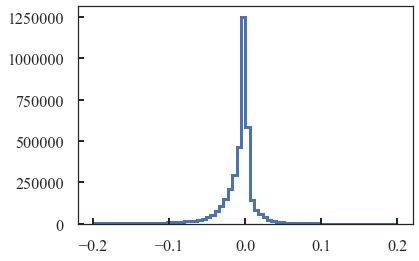

In [49]:
plt.hist(joint['par_err']-jointinputs['parallax_error'],
         histtype='step',lw=3,bins=70,range=[-.2,.2]);
# plt.semilogy();

## Velocity dispersion, action dispersion

In [8]:
import sys
sys.path.append('../../rave_cannon_distances/')
sys.path.append('../../rave_cannon_distances/veldisp_plots/')
from plotting_rave import *

In [21]:
def plot_veldisp_with_age(data,sort_col='age',xlabel=r'$\tau/\mathrm{Gyr}$',
                          title="",with_y=True,with_legend=True,nstars=500,ls='-'):
    data = data.sort_values(sort_col)
    label=True
    for df in np.array_split(data,len(data)/nstars):
        if(label):
            stot=0.
            stot_err=0.
            data_set = df[df.vR!=np.inf]
            data_set = sigma_clip(data_set.vR).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0],label=r'$\sigma_R$')
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vphi!=np.inf]
            data_set = sigma_clip(data_set.vphi).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[1],label=r'$\sigma_\phi$')
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vz!=np.inf]
            data_set = sigma_clip(data_set.vz).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2],label=r'$\sigma_z$')
            eb[-1][0].set_linestyle(ls)
            eb=plt.errorbar([df[sort_col].median()],[np.sqrt(stot)],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[np.sqrt(stot_err/stot)],
                         ms=2,fmt='o',color='k',label=r'$\sigma_\mathrm{tot}$')
            eb[-1][0].set_linestyle(ls)
        else:
            stot=0.
            stot_err=0.
            data_set = df[df.vR!=np.inf]
            data_set = sigma_clip(data_set.vR).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0])
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vphi!=np.inf]
            data_set = sigma_clip(data_set.vphi).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[1])
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vz!=np.inf]
            data_set = sigma_clip(data_set.vz).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[data_set.std()],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[data_set.std()/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2])
            eb[-1][0].set_linestyle(ls)
            eb=plt.errorbar([df[sort_col].median()],[np.sqrt(stot)],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[np.sqrt(stot_err/stot)],
                         ms=2,fmt='o',color='k')
            eb[-1][0].set_linestyle(ls)
        label=False
    plt.xlabel(xlabel)
    if with_y:
        plt.ylabel(r'$\sigma_i/\mathrm{km\,s}^{-1}$')
    else:
        plt.gca().set_yticklabels([])
    plt.annotate(title,xy=(0.95,0.05),xycoords='axes fraction',ha='right',va='bottom',fontsize=20)
    if with_legend:
        plt.legend(loc='lower center',ncol=4,bbox_to_anchor=(1.,1.02))
    plt.ylim(0.,)

In [176]:
from scipy.optimize import leastsq
def mini(v,sig,s=None):
    if s is None:
        s = np.nanstd(v)
    m = np.nanmedian(v)
    v, sig = v[np.abs(v-m)<3.*s], sig[np.abs(v-m)<3.*s]
    def l(p):
        return np.sum((v-m)**2/(p**2+sig**2)**2-1./(p**2+sig**2))
    ll = l(s)
    s1 = .95*s
    while ll*l(s1)>0 and s1>5.:
        s1 *=0.95
    if s1<5.:
        return np.nan
    return brentq(l,s1,s,xtol=1e-2)

In [288]:
ss = joint.groupby(pd.cut(joint['age'],2))

In [325]:
def plot_veldisp_with_age_errors(data,sort_col='age',xlabel=r'$\tau/\mathrm{Gyr}$',
                          title="",with_y=True,with_legend=True,nbins=30,ls='-', grouping='equal'):
    data = data.sort_values(sort_col)
    label=True
    if grouping=='equal':
        groups = np.array_split(data,nbins)
    elif grouping=='even':
        groups = [g[1] for g in data.groupby(pd.cut(data[sort_col],nbins))]
    else: 
        groups = [g[1] for g in data.groupby(pd.cut(np.log(data[sort_col]),nbins))]
    for df in groups:
        if(label):
            stot=0.
            stot_err=0.
            stotE=0.
            stotE_err=0.
            
            data_set = df[df.vR!=np.inf]
            sig = mini(data_set.vR.values,data_set.vR_err.values,sigma_clip(data_set.vR).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vR).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0],label=r'$\sigma_R$')
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vphi!=np.inf]
            sig = mini(data_set.vphi.values,data_set.vphi_err.values,sigma_clip(data_set.vphi).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vphi).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[1],label=r'$\sigma_\phi$')
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vz!=np.inf]
            sig = mini(data_set.vz.values,data_set.vz_err.values,sigma_clip(data_set.vz).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vz).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2],label=r'$\sigma_z$')
            eb[-1][0].set_linestyle(ls)
            eb=plt.errorbar([df[sort_col].median()],[np.sqrt(stotE)],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[np.sqrt(stotE_err/stotE)],
                         ms=2,fmt='o',color='k',label=r'$\sigma_\mathrm{tot}$')
            eb[-1][0].set_linestyle(ls)
        else:
            stot=0.
            stot_err=0.
            stotE=0.
            stotE_err=0.
            data_set = df[df.vR!=np.inf]
            sig = mini(data_set.vR.values,data_set.vR_err.values,sigma_clip(data_set.vR).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vR).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0])
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vphi!=np.inf]
            sig = mini(data_set.vphi.values,data_set.vphi_err.values,sigma_clip(data_set.vphi).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vphi).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[1])
            eb[-1][0].set_linestyle(ls)
            data_set = df[df.vz!=np.inf]
            sig = mini(data_set.vz.values,data_set.vz_err.values,sigma_clip(data_set.vz).clipped.std())
            stotE += sig**2
            stotE_err += sig**2*(sig/np.sqrt(len(data_set)))**2
            
            data_set = sigma_clip(data_set.vz).clipped
            stot += data_set.std()**2
            stot_err += data_set.std()**2*(data_set.std()/np.sqrt(len(data_set)))**2
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2])
            eb[-1][0].set_linestyle(ls)
            eb=plt.errorbar([df[sort_col].median()],[np.sqrt(stotE)],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],yerr=[np.sqrt(stotE_err/stotE)],
                         ms=2,fmt='o',color='k')
            eb[-1][0].set_linestyle(ls)
        label=False
    plt.xlabel(xlabel)
    if with_y:
        plt.ylabel(r'$\sigma_i/\mathrm{km\,s}^{-1}$')
    else:
        plt.gca().set_yticklabels([])
    plt.annotate(title,xy=(0.95,0.05),xycoords='axes fraction',ha='right',va='bottom',fontsize=20)
    if with_legend:
        plt.legend(loc='lower center',ncol=4,bbox_to_anchor=(1.,1.02))
    plt.ylim(0.,)

In [348]:
def plot_actiondisp_with_age_errors(data,sort_col='age',xlabel=r'$\tau/\mathrm{Gyr}$',
                          title="",with_y=True,with_legend=True,nbins=30,ls='-', grouping='equal'):
    print 'NOT USING ERRORS'
    data = data.sort_values(sort_col)
    label=True
    if grouping=='equal':
        groups = np.array_split(data,nbins)
    elif grouping=='even':
        groups = [g[1] for g in data.groupby(pd.cut(data[sort_col],nbins))]
    else: 
        groups = [g[1] for g in data.groupby(pd.cut(np.log(data[sort_col]),nbins))]
    for df in groups:
        if(label):
            
            data_set = df[(df.JR!=np.inf)&(df.JR==df.JR)]
            sig = mini(data_set.JR.values,data_set.JR_err.values,sigma_clip(data_set.JR).clipped.std())
            sig = sigma_clip(data_set.JR).clipped.std()
            data_set = sigma_clip(data_set.JR).clipped
            
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0],label=r'$\sigma_{JR}$')
            eb[-1][0].set_linestyle(ls)
            
            data_set = df[(df.Jz!=np.inf)&(df.Jz==df.Jz)]
            sig = mini(data_set.Jz.values,data_set.Jz_err.values,sigma_clip(data_set.Jz).clipped.std())
            sig = sigma_clip(data_set.Jz).clipped.std()
            
            data_set = sigma_clip(data_set.Jz).clipped
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2],label=r'$\sigma_{Jz}$')
            eb[-1][0].set_linestyle(ls)
        else:
            data_set = df[(df.JR!=np.inf)&(df.JR==df.JR)]
            sig = mini(data_set.JR.values,data_set.JR_err.values,sigma_clip(data_set.JR).clipped.std())
            sig = sigma_clip(data_set.JR).clipped.std()
            
            data_set = sigma_clip(data_set.JR).clipped
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[0])
            eb[-1][0].set_linestyle(ls)
            
            data_set = df[(df.Jz!=np.inf)&(df.Jz==df.Jz)&(df.Jz_err==df.Jz_err)]
            sig = mini(data_set.Jz.values,data_set.Jz_err.values,sigma_clip(data_set.Jz).clipped.std())
            sig = sigma_clip(data_set.Jz).clipped.std()
            
            data_set = sigma_clip(data_set.Jz).clipped
            eb=plt.errorbar([df[sort_col].median()],[sig],
                         xerr=[[df[sort_col].median()-df[sort_col].min()],
                                   [df[sort_col].max()-df[sort_col].median()]],
                            yerr=[sig/np.sqrt(len(data_set))],
                         ms=2,fmt='o',color=sns.color_palette()[2])
            eb[-1][0].set_linestyle(ls)
        label=False
    plt.xlabel(xlabel)
    if with_y:
        plt.ylabel(r'$\sigma_{Ji}/\mathrm{kpc\,km\,s}^{-1}$')
    else:
        plt.gca().set_yticklabels([])
    plt.annotate(title,xy=(0.95,0.05),xycoords='axes fraction',ha='right',va='bottom',fontsize=20)
    if with_legend:
        plt.legend(loc='lower center',ncol=4,bbox_to_anchor=(1.,1.02))
    plt.ylim(0.,)

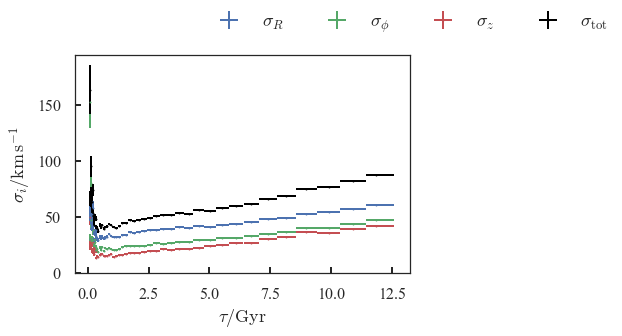

In [297]:
plot_veldisp_with_age_errors(joint[(joint['log10_age']>-1.)&
                                   (joint['vR']==joint['vR'])][:100000].reset_index(drop=True),
                             nbins=50, grouping='logeven')

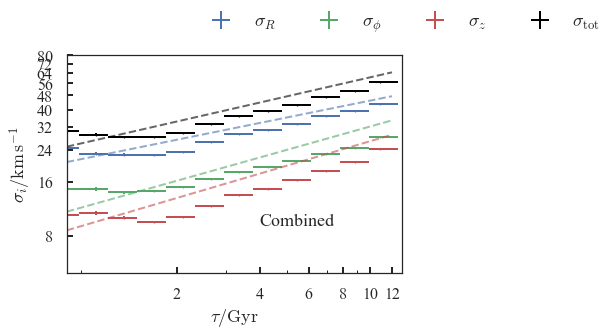

In [321]:
import matplotlib

deltaR=0.2
deltaZ=0.3
meanR = 8.7
jj = joint[(joint['log10_age']>-1.)&
                                   (joint['log10_age_err']<0.2)&
                                   (joint['vR']==joint['vR'])&(joint['flag']==0)&
                            (joint['R']<meanR+deltaR)&(joint['R']>meanR-deltaR)&
                                   (np.abs(joint['z'])<deltaZ)].reset_index(drop=True)
plot_veldisp_with_age_errors(jj, nbins=20, grouping='logeven')
label = 'Combined'
label_loc = (0.8,0.2)
plt.ylim(5.,80.)
plt.xlim(0.8,13.)
plt.gca().set_yscale('log');
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_yaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_minor_locator(matplotlib.ticker.NullLocator())
plt.gca().get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.gca().set_xscale('log');
plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_xaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.annotate(label,xy=label_loc,xycoords='axes fraction',
             ha='right',va='bottom',fontsize=18)
xx = np.linspace(0.8,12.)
plt.plot(xx,22.*xx**0.31,ls='dashed',alpha=0.6)
plt.plot(xx,12.*xx**0.43,ls='dashed',alpha=0.6)
plt.plot(xx,9.5*xx**0.45,ls='dashed',alpha=0.6)
plt.plot(xx,27.*xx**0.35,color='k',ls='dashed',alpha=0.6)

NOT USING ERRORS


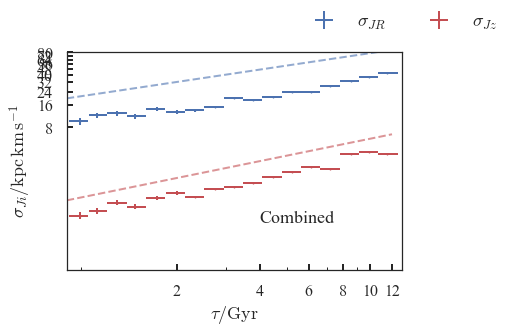

In [353]:
deltaR=0.1
deltaZ=0.1
meanR = 8.2
jj = joint[(joint['log10_age']>-1.)&
                                   (joint['log10_age_err']<0.2)&
                                   (joint['vR']==joint['vR'])&(joint['flag']==0)&
                            (joint['R']<meanR+deltaR)&(joint['R']>meanR-deltaR)&
                                   (np.abs(joint['z'])<deltaZ)].reset_index(drop=True)
plot_actiondisp_with_age_errors(jj, grouping='logeven')
label = 'Combined'
label_loc = (0.8,0.2)
plt.ylim(0.1,80.)
plt.xlim(0.8,13.)
plt.gca().set_yscale('log');
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_yaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_minor_locator(matplotlib.ticker.NullLocator())
plt.gca().get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.gca().set_xscale('log');
plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_xaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.annotate(label,xy=label_loc,xycoords='axes fraction',
             ha='right',va='bottom',fontsize=18)
xx = np.linspace(0.8,12.)
plt.plot(xx,22.*xx**0.55,ls='dashed',alpha=0.6)
plt.plot(xx,xx**0.75,ls='dashed',alpha=0.6, color=sns.color_palette()[2])

3681


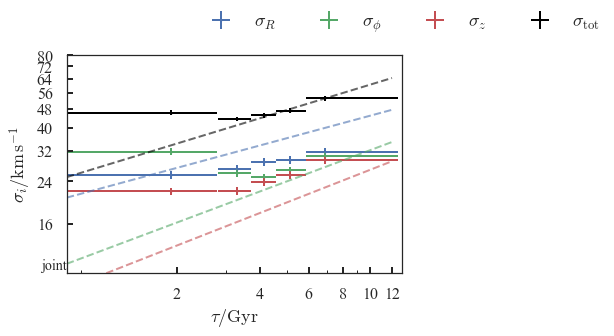

In [202]:
joint['age']=np.power(10.,joint['log10_age'])
deltaR=0.3
deltaZ=1.
meanR = 15.
df = joint[(joint['log10_age']==joint['log10_age'])&(joint['log10_age']>-1)&
                           (joint['vR']==joint['vR'])&(joint['flag']==0)&
                           (joint['log10_age_err']<0.3)&
                            (joint['R']<meanR+deltaR)&(joint['R']>meanR-deltaR)&(np.abs(joint['z'])<deltaZ)]
print len(df)
plot_veldisp_with_age(df,
                      sort_col='age',nstars=int(len(df)/5.))
label = 'joint'
label_loc = (0.,0.)
plt.ylim(10.,80.)
plt.xlim(0.8,13.)
plt.gca().set_yscale('log');
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_yaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_minor_locator(matplotlib.ticker.NullLocator())
plt.gca().get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.gca().set_xscale('log');
plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_xaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
plt.annotate(label,xy=label_loc,xycoords='axes fraction',
             ha='right',va='bottom',fontsize=14)
xx = np.linspace(0.8,12.)
plt.plot(xx,22.*xx**0.31,ls='dashed',alpha=0.6)
plt.plot(xx,12.*xx**0.43,ls='dashed',alpha=0.6)
plt.plot(xx,9.5*xx**0.45,ls='dashed',alpha=0.6)
plt.plot(xx,27.*xx**0.35,color='k',ls='dashed',alpha=0.6)


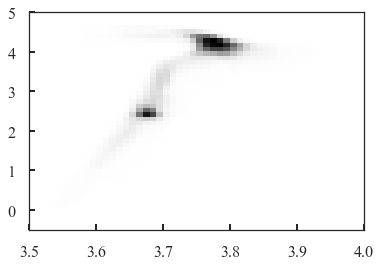

In [161]:
from matplotlib.colors import LogNorm
plt.hist2d(joint.log10_teff[joint.log10_age_err<0.2],
           joint.logg[joint.log10_age_err<0.2],bins=50,range=[[3.5,4.],[-0.5,5.]]);

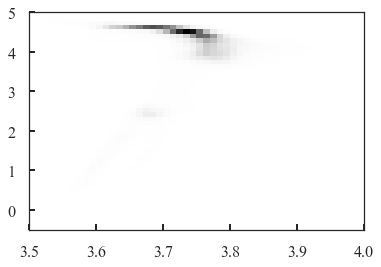

In [160]:
plt.hist2d(joint.log10_teff[joint.log10_age_err>0.2],
           joint.logg[joint.log10_age_err>0.2],bins=50,range=[[3.5,4.],[-0.5,5.]]);

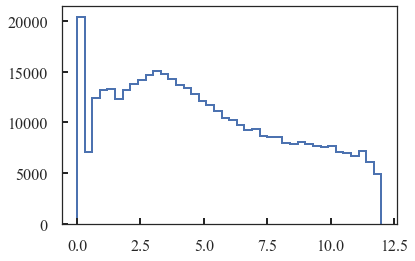

In [77]:
plt.hist(rave.to_pandas().res,range=[0.,12.],histtype='step',lw=2,bins=40);

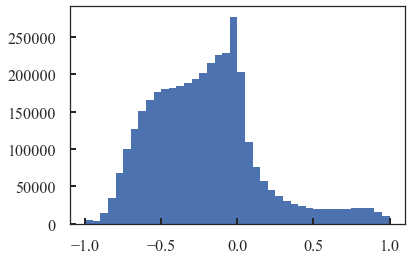

In [363]:
plt.hist(joint['log10age_Z_corr']*joint['log10_age']/joint['log10_age_err']*joint['Z']/joint['Z_err'],
         range=[-1.,1.],bins=40);

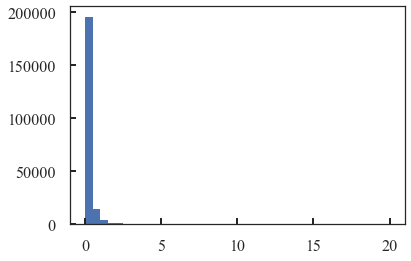

In [380]:
plt.hist(np.power(10.,joint['log10_av'])[joint['log10_age']<-1.],
         range=[0.,20.],bins=40);